In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

sns.set_theme()

In [3]:
data = pd.read_csv("../data/vehicle_clean_final.csv")

In [4]:
target = data['Log Price']
input = data.drop(['Log Price'], axis=1)

In [8]:
scaler = StandardScaler()
scaler.fit(input)
input_scaled = scaler.transform(input)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(input_scaled, target, test_size=0.2, random_state=42)

### Regression

In [11]:

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

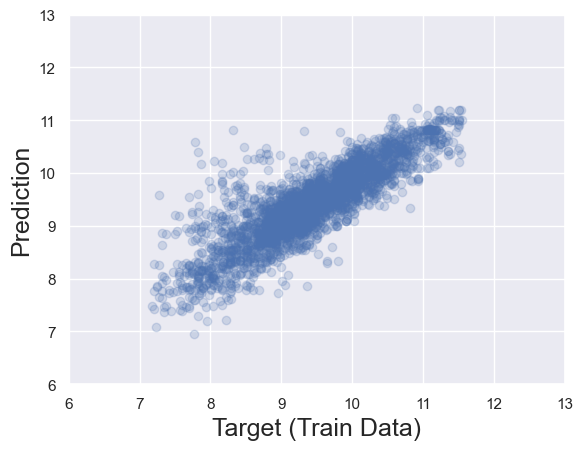

In [ ]:

y_pred = reg.predict(x_train)

plt.scatter(y_train, y_pred, alpha=0.2)

plt.xlabel('Target (Train Data)', size=18)
plt.ylabel('Prediction', size=18)

plt.xlim(6, 13)
plt.ylim(6, 13)

plt.show()


### Residuals Distribution

Text(0.5, 1.0, 'Residuals PDF')

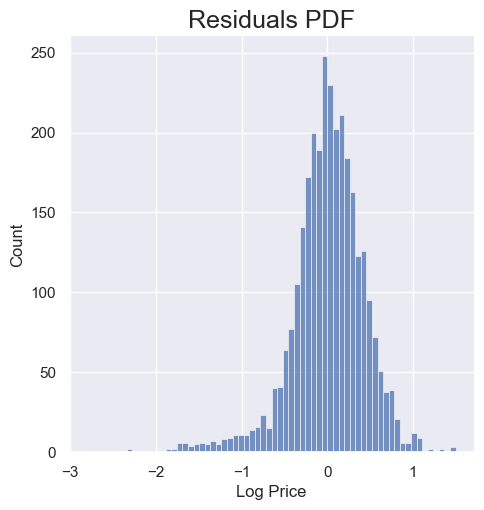

In [20]:
sns.displot(y_train - y_pred)
plt.title("Residuals PDF", size=18)

### Score

In [24]:
score = reg.score(x_train, y_train)

intercept = reg.intercept_
coefficient = reg.coef_

print("Score: ", score)
print("Intercept: ", intercept)
print("Coefficients: ", coefficient)

Score:  0.7287369108945309
Intercept:  9.384868122351534
Coefficients:  [-0.43196887  0.20897587  0.01637673 -0.0056946  -0.13554145 -0.17147173
 -0.05478981 -0.08272038 -0.14085002 -0.09004446 -0.19518505 -0.12906024
 -0.16433089 -0.11862093 -0.02963574 -0.13578964  0.31673723]


In [25]:
summary = pd.DataFrame(input.columns.values, columns=['Features'])
summary['Weights'] = reg.coef_
display(summary)

,Features,Weights
0,Mileage,-0.431969
1,EngineV,0.208976
2,Brand_BMW,0.016377
3,Brand_Mercedes-Benz,-0.005695
4,Brand_Mitsubishi,-0.135541
5,Brand_Renault,-0.171472
6,Brand_Toyota,-0.054790
7,Brand_Volkswagen,-0.082720
8,Body_hatch,-0.140850
9,Body_other,-0.090044


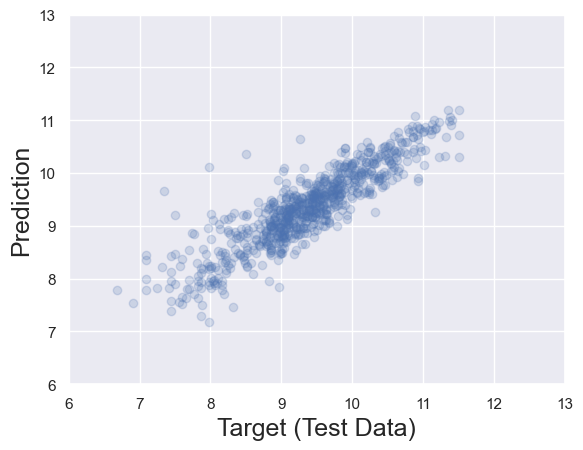

In [29]:
y_pred_test = reg.predict(x_test)

plt.scatter(y_test, y_pred_test, alpha=0.2)

plt.xlabel('Target (Test Data)', size=18)
plt.ylabel('Prediction', size=18)

plt.xlim(6, 13)
plt.ylim(6, 13)

plt.show()

### Actual Price & Difference%

In [36]:
final_summary = pd.DataFrame(np.exp(y_pred_test), columns=['Prediction'])
y_test = y_test.reset_index(drop=True)

final_summary['Target'] = np.exp(y_test)
final_summary['Residual'] = final_summary['Target'] - final_summary['Prediction']
final_summary['Difference%'] = np.absolute((final_summary['Residual'] / final_summary['Target']) * 100)

display(final_summary)

,Prediction,Target,Residual,Difference%
0,21639.560370,28000.0,6360.439630,22.715856
1,12318.901340,10900.0,-1418.901340,13.017443
2,22182.319536,18500.0,-3682.319536,19.904430
3,27412.378026,27800.0,387.621974,1.394324
4,36397.700500,57000.0,20602.299500,36.144385
...,...,...,...,...
757,12383.212430,15800.0,3416.787570,21.625238
758,3778.105937,2900.0,-878.105937,30.279515
759,3746.892448,1500.0,-2246.892448,149.792830
760,7937.520983,9000.0,1062.479017,11.805322


In [37]:
final_summary.to_csv("../data/final_summary.csv", index=False)